# Heading of the problem statement

One liner descripition about the code it is going to do

**Problem Statement**

Talk about the problem statement we are going to solve.
- subpoint1
- subpoint2




### Part 1 - Describe about the steps taken in this section i,e part-1

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

### Part 2 - Describe about the steps taken in this section i,e part-2

Give some comments about the below code is going to do
 

In [2]:
# Set few options for Dataframe which will be helpfull in viewing the output
#pd.set_option('display.max_column', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_seq_items', None)
#pd.set_option('display.max_colwidth', 100)
#pd.set_option('expand_frame_repr', True)
#Check the datatypes of all the columns of the dataframe
lendingDF = pd.read_csv('loan.csv')
lendingDF.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [3]:
#Get the total number of rows and columns  present
lendingDF.shape

(39717, 111)

In [4]:
#Drop Columns in which more than 40% of them are having NaN values or not having any values
rowcounts = lendingDF.shape[0]
columnheaders = columnheaders = list(lendingDF.columns.values)

null_columnnames=[]
for x in columnheaders:
    sum = lendingDF[x].isnull().sum()
    null_percentage = (sum/rowcounts) * 100
    if null_percentage > 40:
        null_columnnames.append(x)

lendingDF.drop(null_columnnames,axis=1,inplace=True)
#Get the total number of rows and columns  present after Stage-1 cleanup 
lendingDF.shape

(39717, 54)

In [5]:
#Drop Columns in which there are only unquie values present. AS these values donot provide any further information
rowcounts = lendingDF.shape[0]
#GEt the new set of column headers
columnheaders = columnheaders = list(lendingDF.columns.values)
uniquevalues_columns = []
for x in columnheaders:
    if lendingDF[x].nunique()==1:
        uniquevalues_columns.append(x)

lendingDF.drop(uniquevalues_columns,axis=1,inplace=True)
#Get the total number of rows and columns  present after Stage-2 cleanup 
lendingDF.shape

(39717, 45)

In [6]:
lendingDF.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [7]:
#Drop 'member_id','id','url', 'desc' as this column has only unique values and is of not much use in the EDA topic.
lendingDF.drop(['member_id','id','url','desc'],axis=1,inplace=True)
#Get the total number of rows and columns  present after Stage-3 cleanup 
lendingDF.shape

(39717, 41)

In [8]:
#On analysis of the "emp_title", column with values_count(), we can see only two values are there which are having more than 100
#Overall % of these records is less than 1%. So by dropping them we will not have much impact on the EDA topic.
lendingDF.drop(['emp_title','zip_code'],axis=1,inplace=True)
lendingDF.shape

(39717, 39)

In [9]:
lendingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [10]:
#Findout columns which are having missing values
columnheaders = columnheaders = list(lendingDF.columns.values)

for x in columnheaders:
    sum = lendingDF[x].isnull().sum()
    if sum > 0:
        print(x,sum)

emp_length 1075
title 11
revol_util 50
last_pymnt_d 71
last_credit_pull_d 2
pub_rec_bankruptcies 697


In [11]:
#Fill missing values in "emp_length" column
#Convert the data type into string
lendingDF['emp_length'] = lendingDF['emp_length'].astype("string")
lendingDF['emp_length'] = lendingDF['emp_length'].fillna(lendingDF['emp_length'].mode()[0])

In [12]:
#Fill missing values in "revol_util" column by converting into string and later using apply convert to float
lendingDF['revol_util'] = lendingDF['revol_util'].astype("string")
lendingDF['revol_util'] = lendingDF['revol_util'].fillna(lendingDF['revol_util'].mode()[0])
lendingDF['revol_util'] = lendingDF['revol_util'].apply(lambda x: float(x[:-1]))
lendingDF['revol_util'].isnull().sum()

0

In [13]:
#Fill missing values in 'title' column using mode method.(First convert to string and then used mode)
lendingDF['title'] = lendingDF['title'].astype("string")
lendingDF['title'] = lendingDF['title'].fillna(lendingDF['title'].mode()[0])
lendingDF['title'].isnull().sum()

0

In [14]:
#Fill missing values in 'last_pymnt_d' column using mode method.(First convert to string and then used mode)
lendingDF['last_pymnt_d'] = lendingDF['last_pymnt_d'].astype("string")
lendingDF['last_pymnt_d'] = lendingDF['last_pymnt_d'].fillna(lendingDF['last_pymnt_d'].mode()[0])
lendingDF['last_pymnt_d'].isnull().sum()

0

In [15]:
#Fill missing values in 'last_credit_pull_d' column using mode method.(First convert to string and then used mode)
lendingDF['last_credit_pull_d'] = lendingDF['last_credit_pull_d'].astype("string")
lendingDF['last_credit_pull_d'] = lendingDF['last_credit_pull_d'].fillna(lendingDF['last_credit_pull_d'].mode()[0])
lendingDF['last_credit_pull_d'].isnull().sum()

0

In [16]:
#Dropping rows having null values in column 'pub_rec_bankruptcies'
lendingDF = lendingDF[~(lendingDF['pub_rec_bankruptcies'].isnull())]
lendingDF['pub_rec_bankruptcies'].isnull().sum()
lendingDF.shape

(39020, 39)

In [17]:
lendingDF['int_rate'] = lendingDF['int_rate'].astype("string")
lendingDF['int_rate'] = lendingDF['int_rate'].apply(lambda x: float(x[:-1]))

In [18]:
lendingDF['revol_util'] = lendingDF['int_rate'].astype("float32")

In [19]:
lendingDF.dtypes

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                  string
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       string
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float32
total_acc                    int64
out_prncp                  float64
out_prncp_inv              float64
total_pymnt         

Do check for outliers on 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', and 'annual_inc'

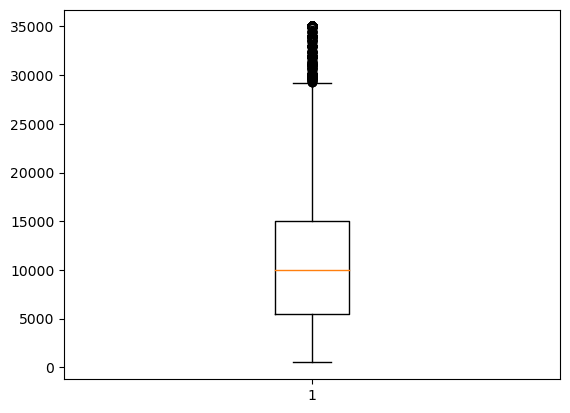

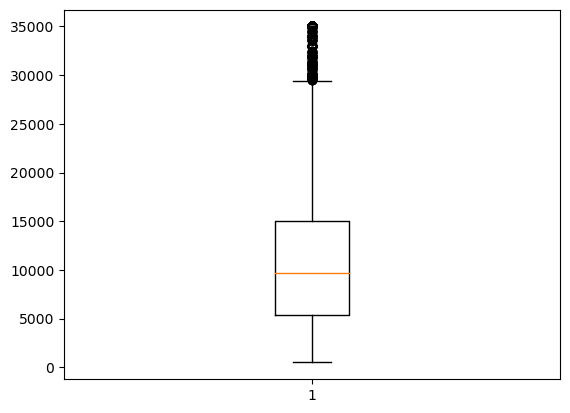

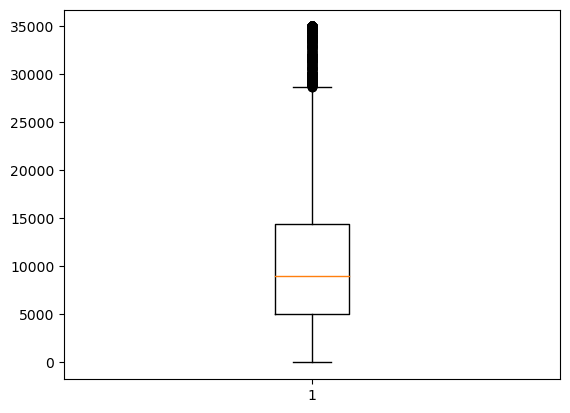

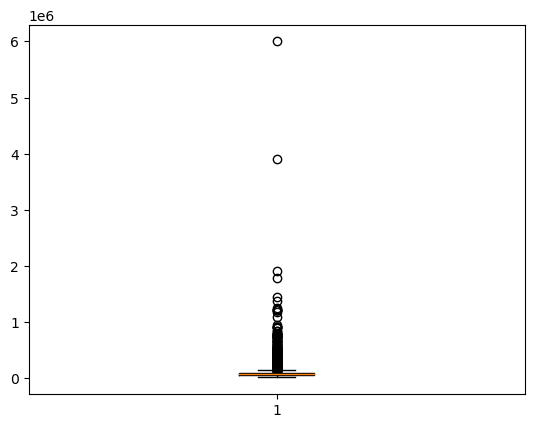

In [20]:
outlier_check_col = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc']
#outlier_check_col = ['loan_amnt', 'annual_inc']
for colName in outlier_check_col:
    plt.boxplot(lendingDF[colName])
    plt.show()

In [21]:
def remove_outliers_IQR_method(col_name):
    global lendingDF
    q1 = lendingDF[col_name].quantile(0.25)
    q3 = lendingDF[col_name].quantile(0.75)
    iqr = q3 - q1
    low_fence = q1 - 1.5*iqr
    high_fence = q3 + 1.5*iqr
    print(low_fence, high_fence)
    lendingDF = lendingDF[ (lendingDF[col_name]>=low_fence) & (lendingDF[col_name]<=high_fence)]

-8750.0 29250.0
-9100.0 28500.0
-8350.0 27250.0
-20000.0 140000.0


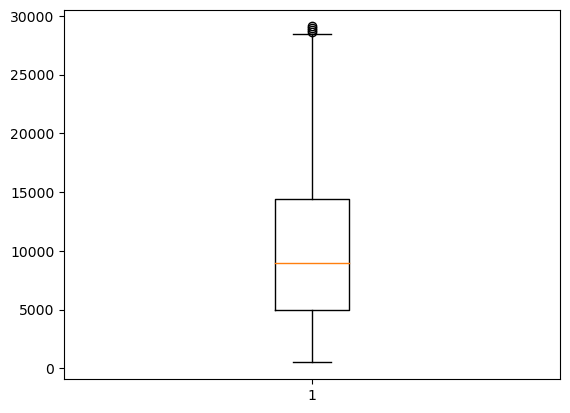

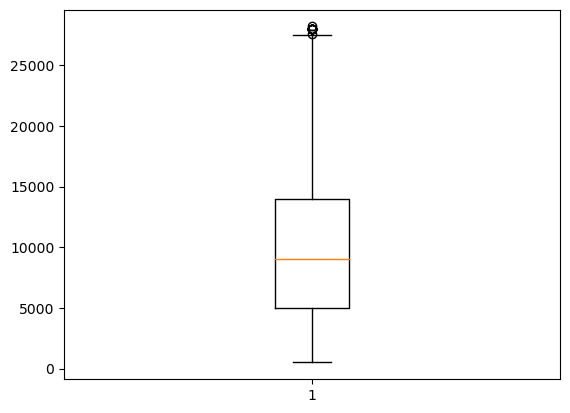

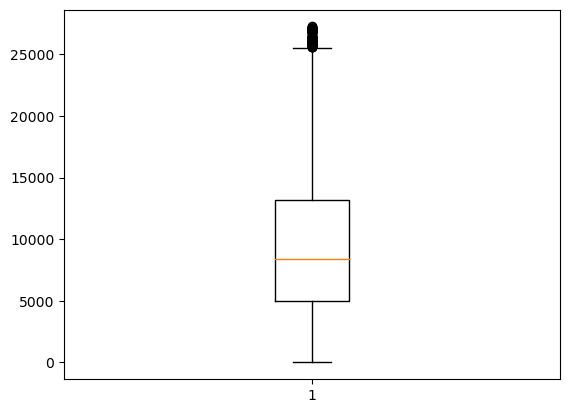

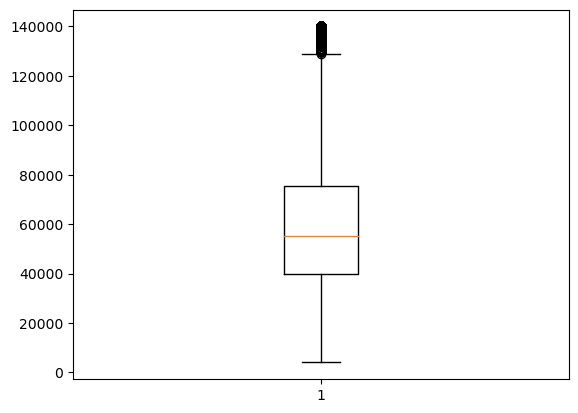

In [22]:
for colName in outlier_check_col:
    remove_outliers_IQR_method(colName)
    
for colName in outlier_check_col:
    plt.boxplot(lendingDF[colName])
    plt.show()

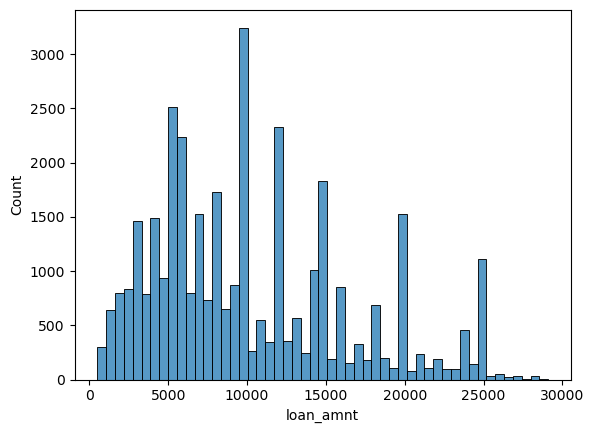

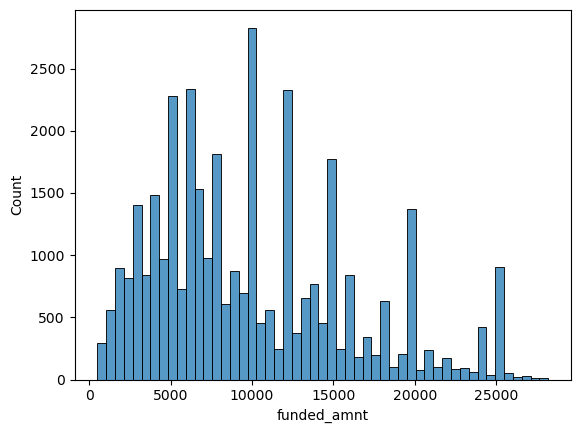

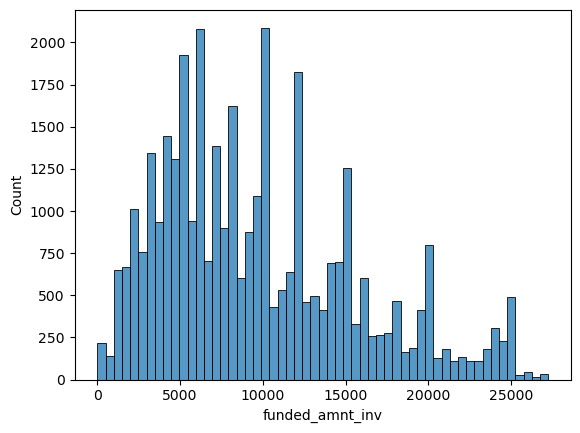

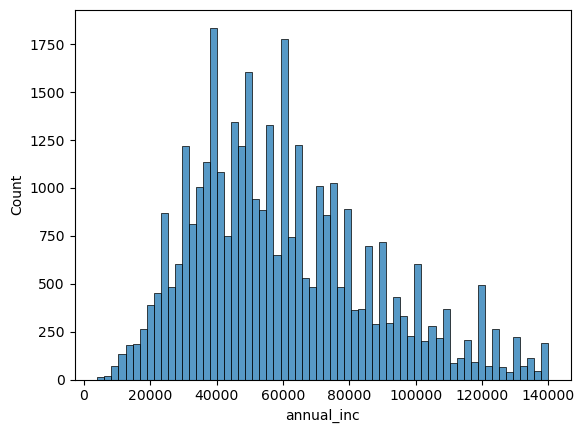

In [23]:
for colName in outlier_check_col:
    sns.histplot(lendingDF[colName])
    plt.show()

Loan Status categorical column - Anaylysis

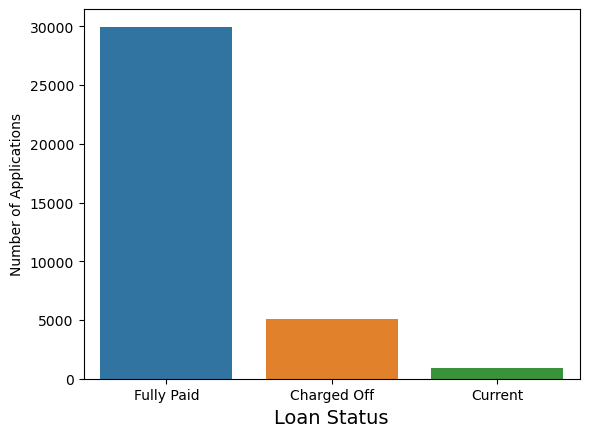

In [24]:
categorical_col = ['loan_status']

pltAxes = sns.countplot(x = lendingDF[categorical_col[0]])
pltAxes.set_xlabel('Loan Status',fontsize=14)
pltAxes.set_ylabel('Number of Applications') 
plt.show()


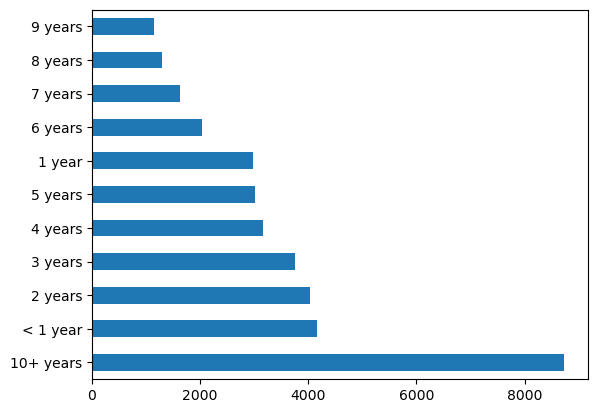

In [25]:
lendingDF['emp_length'].value_counts().plot.barh()
plt.show()

Additional comments